# Travail Pratique #2

- Yoann CORGNET (CORY14010400)  

## Exercices

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [5]:
# importation des données 
sales = pd.read_csv('data/MilwaukeePropertySalesData.csv')

### Exercice 1

Nous supprimons les valeurs extrêmes et les identifierons avec la méthode du Z-score.

In [33]:
# Cacule des Z-scores
z_score = stats.zscore(sales['FinishedSqft'])

print(f"Proportion de valeurs extrêmes : {len(np.abs(z_score) <= 3) * 100 / sales.size:.2f}%")

# Suppression des Z-scores extrèmes
sales = sales[np.abs(z_score) <= 3]


Proportion de valeurs extrêmes : 4.76%


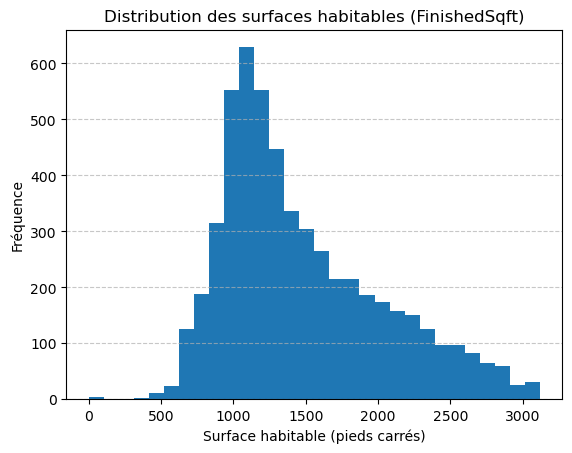

In [54]:
# Affichage après nettoyage
plt.hist(sales['FinishedSqft'], bins=30)
plt.title("Distribution des surfaces habitables (FinishedSqft)")
plt.xlabel("Surface habitable (pieds carrés)")
plt.ylabel("Fréquence")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Exercice 2

Pour savoir si effectivement le prix moyen de vente est supérieur dans le District 11, nous utiliserons le T-test d'échantillon unique avec un alpha de 5 %.

- H0 : Le prix moyen de vente dans le District 11 est de 250 000 $ ou moins.   
- H1 : Le prix moyen de vente dans le District 11 est supérieur à 250 000.  

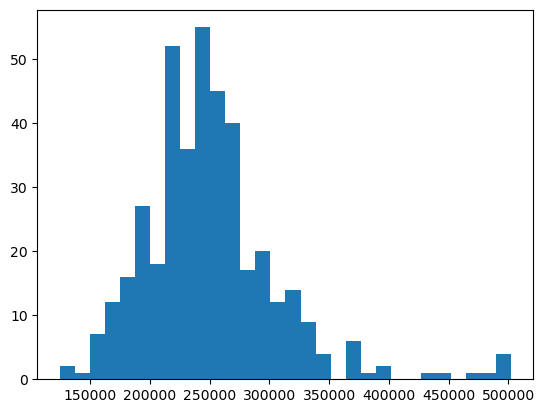

In [72]:
# Filtrer les données pour ne garder que les ventes résidentielles dans le District 11
district_11_sales = sales[(sales['District'] == 11) & (sales['PropType'] == 'Residential')]['Sale_price']

plt.hist(district_11_sales, bins = 30);

In [73]:
# Les prix de ventes semble bien suivre une distribution normal
# nous pouvons donc effectuer le T-test
t_value, p_value = stats.ttest_1samp(district_11_sales, 250_000)

print(f"T value = {t_value:.2f}")
print(f"P value = {p_value:.2f}")

T value = 0.52
P value = 0.61


La p-value est de 0.61 > 0.05, il n'y a donc pas assez de preuvent pour rejeter H0.   
Donc a preuve du contraire, le prix moyen de vente dans le dristrict 11 n'est pas superieur à 250 000 $.

### Exercice 3

Un chercheur a déterminé s'il existe une différence significative de superficie habitable entre les habitations construites 
Avant 1950 et celles construites en 1950 ou après.
Pour cela, nous utiliserons un T-test independant, avec un alpha de 0.05.

H0 : Il n'y a pas de différence significative entre les superficies habitables d'avant 1950 et d'après 1950.  
H1 : Il y a une différence significative entre les superficies habitables d'avant 1950 et d'après 1950.  

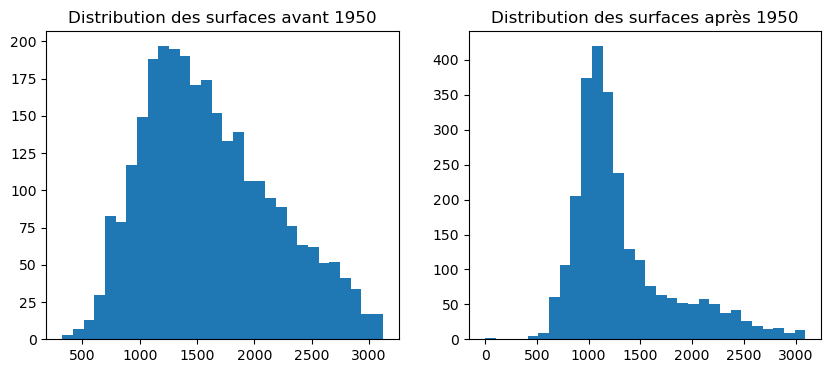

In [74]:
sqrft_before_1950 = sales[sales['Year_Built'] < 1950]['FinishedSqft']
sqrft_after_1950  = sales[sales['Year_Built'] >= 1950]['FinishedSqft']

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].set_title("Distribution des surfaces avant 1950")
ax[0].hist(sqrft_before_1950, bins=30)
ax[1].set_title("Distribution des surfaces après 1950")
ax[1].hist(sqrft_after_1950, bins=30);

In [76]:
# Les prix de ventes semble bien suivre une distribution normal
# nous pouvons donc effectuer le T-test
t_value, p_value = stats.ttest_ind(sqrft_before_1950, sqrft_after_1950)

print(f"T value = {t_value:.2f}")
print(f"P value = {p_value}")

T value = 20.48
P value = 8.141544232319778e-90


La p-value est de 8.14e-90 > 0.05, l'hypothèse nulle est donc rejetée.   
Il y a donc une différence de superficie habitable entre les habitations d'avant 1950 et d'après 1950.

### Exercice 4

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

data_cleaned = data.dropna (subset=['Bdrms', 'Sale_price']).copy()
data_cleaned['Bdrms'] = np.where( data_cleaned['Bdrms'] >= 5, '5+' , data_cleaned['Bdrms'].astype(int))
median_price = data_cleaned['Sale_price'].median()   # Calcule la médiane du prix de vente
data_cleaned['Price_Category'] = np.where(data_cleaned['Sale_price'] > median_price , 'Above Median', 'Below Median')   # +1 colonne : propriétés selon prix médian
contingency_table = pd.crosstab(data_cleaned['Bdrms'], data_cleaned['Price_Category'])  # table de contingence
chi2, p, dof, expected = chi2_contingency(contingency_table)  # test Khi-deux

print("Table de contingence : ")
print(contingency_table)
print("\n Test Khi-deux : ")
print(f"Chi-Square Statistic = {chi2}")
print(f"p-value = {p}")
print(f"Degrees of Freedom = {dof}")

On utilise une table de contingence pour analyser la relation entre le nombre de chambres 
et la catégorie de prix (Above Median ou Below Median)
On applique le test du Khi-deux pour déterminer si cette relation est significative

Test Khi-deux :
Chi-Square Statistic = 75.37
p-value = 7.79 × 10^−15
Degrees of Freedom = 5

La p-value étant bien inférieure à 0.05, nous concluons qu'il existe une relation significative 
entre le nombre de chambres et le fait qu'une propriété soit vendue au-dessus ou en dessous du prix médian

### Exercice 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data['Sale_date'] = pd.to_datetime(data['Sale_date'])
data['YearMonth'] = data['Sale_date'].dt.to_period('M')   # Extraire l'année et le mois de la date de vente
monthly_avg_price = data.groupby('YearMonth')['Sale_price'].mean()   # Calcule prix moyen mensuel
monthly_variation = monthly_avg_price.pct_change() * 100   # Calcule variations mensuelles (en %)

plt.figure(figsize=(10, 6))
monthly_variation.plot(kind='line', marker='o', linestyle='-')
plt.title("Variation mensuelle du prix moyen de vente (%)")
plt.xlabel("Mois")
plt.ylabel("Variation (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

Nous avons analysé la variation mensuelle en pourcentage du prix moyen de vente 
pour identifier les tendances du marché immobilier

En regroupant les données par mois, la moyenne des prix a été calculée 
et les variations en pourcentage ont été obtenues avec : pct_change()
Le graphique montre des variations importantes tout au long de l'année, 
montrant comment varie la demande du client sur ce marché.

### Exercice 6

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

data['Sale_date'] = pd.to_datetime(data['Sale_date'])
daily_sales = data.groupby(data['Sale_date'].dt.date).size()  # Ventes par jour
adf_test = adfuller(daily_sales) # test Dickey-Fuller

print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

Nous avons analysé la stationnarité des ventes quotidiennes à l'aide du test Dickey-Fuller Augmenté (ADF)
Les résultats montrent une statistique ADF de ~ -5.50 et une p-value faible, inférieure au seuil de 0.05
Ces résultats confirment que la série est stationnaire, 
ce qui est essentiel pour garantir la fiabilité des analyses prédictives basées sur cette série temporelle

### Exercice 7